In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np 

In [2]:
from epistasis.artificial import ArtificialMap
from epistasis.plotting import epistasis_bar, correlation
from epistasis.models import LocalEpistasisModel, ProjectedEpistasisModel

# Figure 1

Model's $R^2$ score when underfitting. 

In [76]:
length = 8
order = 8
gpm = ArtificialMap(length,order)
gpm.add_noise(0.05)
wildtype = gpm.wildtype
genotypes = gpm.genotypes
phenotypes = gpm.phenotypes
errors = gpm.errors

In [77]:
regression_order = 3
model = ProjectedEpistasisModel(wildtype, genotypes, phenotypes, regression_order)
model.estimate_interactions()

In [78]:
score = model.score
learned = model.Interactions.values
known = gpm.Interactions.values[:len(learned)]

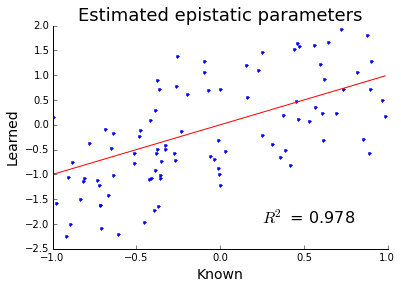

In [80]:
fig, ax = plt.subplots(1,1, dpi=300, figsize=[6,4])

ax.plot(known, learned, '.b')
ax.hold(True)
x = np.linspace(min(known), max(known), 1000)
ax.plot(x,x, '-r', linewidth=1)
ax.set_xlabel("Known", fontsize = 14)
ax.set_ylabel("Learned", fontsize=14)
ax.set_title("Estimated epistatic parameters", fontsize=18)

## Turn off spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Add model score to plot
ax.annotate("$R^2$ = " + str(round(score,3)), xy=[.25, -2], fontsize=16)

# Figure 2

Propagating error in full order model to determine epistatic parameters. 

In [94]:
length = 6
order = 3
gpm = ArtificialMap(length, order)
gpm.add_noise(0.02)
g, p = gpm.create_samples(10)
wildtype = gpm.wildtype
genotypes = g[:,0]
phenotypes = np.mean(p, axis=1)
errors = np.std(p,axis=1)

In [95]:
model = LocalEpistasisModel(wildtype, genotypes, phenotypes, phenotype_errors=errors)
model.estimate_interactions()
model.estimate_error()
learned = model.Interactions.values
known = gpm.Interactions.values[:len(learned)]

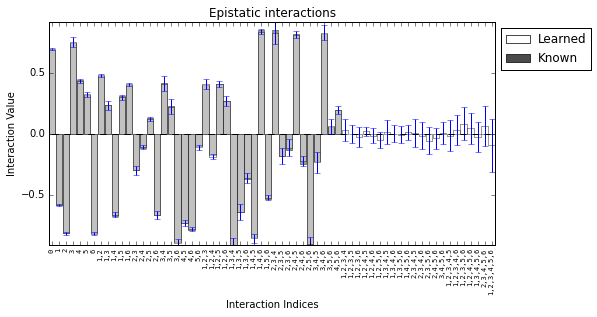

In [96]:
fig, ax = epistasis_bar(gpm, color='k', figsize=[8,4])
fig, ax = epistasis_bar(model, sigmas=1, color='w', ax=ax, figsize=[8,4])
learned_patch = mpatches.Patch(facecolor='w', label='Learned', alpha=0.7, edgecolor='k')
known_patch = mpatches.Patch(facecolor='k', label='Known', alpha=0.7, edgecolor='k')
ax.legend(loc=2, handles=[learned_patch,known_patch], bbox_to_anchor=(1, 1))  

In [99]:
model = ProjectedEpistasisModel(wildtype, genotypes, phenotypes, regression_order=3, phenotype_errors=errors)
model.estimate_interactions()
model.estimate_error()
learned = model.Interactions.values
known = gpm.Interactions.values[:len(learned)]

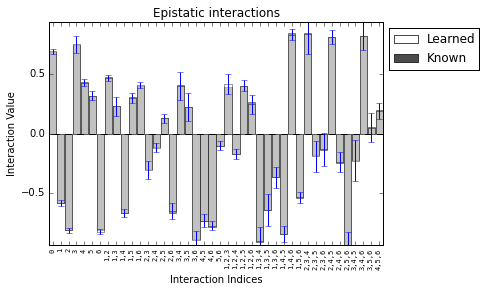

In [102]:
fig, ax = epistasis_bar(gpm, color='k', figsize=[6,4])
fig, ax = epistasis_bar(model, sigmas=2, color='w', ax=ax, figsize=[4,4])
learned_patch = mpatches.Patch(facecolor='w', label='Learned', alpha=0.7, edgecolor='k')
known_patch = mpatches.Patch(facecolor='k', label='Known', alpha=0.7, edgecolor='k')
ax.legend(loc=2, handles=[learned_patch,known_patch], bbox_to_anchor=(1, 1))  